<a href="https://colab.research.google.com/github/mshah1201/CIS9650/blob/main/Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

Men's Swimming Team

In [11]:
#making a dictionary of all the webiste links from which we need the heights

mens_swimming_teams = {
                  'mens_swimming': ['https://csidolphins.com/sports/mens-swimming-and-diving/roster/2023-2024?view=2', 'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster?view=2','https://yorkathletics.com/sports/mens-swimming-and-diving/roster?view=1','https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster?view=2','https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster?view=2','https://mckbearcats.com/sports/mens-swimming-and-diving/roster?view=2','https://ramapoathletics.com/sports/mens-swimming-and-diving/roster?view=2','https://oneontaathletics.com/sports/mens-swimming-and-diving/roster?view=2','https://binghamtonbearcats.com/sports/mens-swimming-and-diving/roster/2021-22?view=2','https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22?view=2']
                  }

In [12]:
#Defining an average height function

def average_height(url_list):
  #Keeping a list of all the players
    players = []

  #Making sure the connection stays active

    for url in url_list:
        headers = {
            'User-Agent': 'Mozilla/5.0 ... Safari/537.36',
            'Accept': 'text/html,...',
            'Accept-Language': 'en-US,en;q=0.9',
            'Connection': 'keep-alive'
        }

  #Extracting information

        page = requests.get(url, headers=headers)

  #Checking if the connection is successfully established and if yes, then read the html

        if page.status_code == 200:
            soup = BeautifulSoup(page.content, 'html.parser')

  #Finding names and heights of the players with the help of tags and class

            raw_heights = soup.find_all('td', class_='height')
            name_tags = soup.find_all('td', class_='sidearm-table-player-name')

  #Now the names and heights will be extracted. We need to convert the format of heights from 'n-n' to inches in float data type

            for name_tag, height_tag in zip(name_tags, raw_heights):
                name = name_tag.get_text().strip()
                height_str = height_tag.get_text().strip()

                try:
                    parts = height_str.split('-')
                    if len(parts) == 2:
                        feet = float(parts[0]) * 12
                        inches = float(parts[1])
                        height_inches = feet + inches
                        players.append({'Name': name, 'Height': height_inches})
                except (ValueError, IndexError):
                    continue
  #Creating the dataframe
    df = pd.DataFrame(players)
    return df

Dataframe for mens swim team

In [ ]:
#Calculating the average by calling the function we created

mens_swim_df = average_height(mens_swimming_teams['mens_swimming'])
mens_swim_df

,Name,Height
0,Anthony Attenborough,70.0
1,James Curran,69.0
2,Charles Cusumano,64.0
3,David Fayngersh,70.0
4,Michael Graham,70.0
...,...,...
173,Kieran Hassard,72.0
174,Anthony Laite,69.0
175,Drew MacDonald,72.0
176,Kyle Morken,73.0


Downloading it as CSV file

In [ ]:
#Calculating the average by calling the function we created and exporting it as .csv file.

mens_swim_df = average_height(mens_swimming_teams['mens_swimming'])
mens_swim_df.to_csv('mens_swimming_heights.csv', index=False)

In [ ]:
#Running the data to calculate all the statistical numbers to check

mens_swim_df.describe()

,Height
count,178.000000
mean,71.078652
std,2.896422
min,63.000000
25%,69.000000
50%,71.500000
75%,73.000000
max,79.000000


In [ ]:
#Calculating and printing the average/mean of the data

mens_swim_avg = mens_swim_df['Height'].mean()
print(f'The avg height of the mens swim team is {mens_swim_avg}')

The avg height of the mens swim team is 71.07865168539325


In [ ]:
#average_height = sum(processed_heights) / len(processed_heights)


In [ ]:
top_heights = mens_swim_df['Height'].nlargest(5).unique()
fifth_height = top_heights[-1]

# filter the dataframe to include all athletes with height >= fifth height
mens_swim_df[mens_swim_df['Height'] >= fifth_height]

,Name,Height
61,Mattia Giurgevich,76.0
71,Adam Szczerba,76.0
85,Colton Grimes,78.0
101,Michael Stooke,76.0
103,Domantas Tarnauskas,77.0
104,Tyson Upton,79.0
109,Tyler Finkle,76.0
118,Joe Swede,76.0
141,Gavin Weseman,76.0
151,Brian Harding,76.0


In [13]:
shortest_heights = mens_swim_df['Height'].nsmallest(5).unique()
fifth_height = shortest_heights[-1]

# filter the dataframe to include all athletes with height >= fifth height
mens_swim_df[mens_swim_df['Height'] <= fifth_height]


,Name,Height
2,Charles Cusumano,64.0
27,Samuel Liao,65.0
29,Eric Mayzlin,65.0
38,Stuart Xu,65.0
81,Miles Fleischer,63.0
88,Wyatt Kurtz,65.0


Men's Volleyball team

In [14]:

mens_volleyball_teams = {
                  'mens_volleyball': ['https://csidolphins.com/sports/mens-swimming-and-diving/roster/2023-2024?view=2', 'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster?view=2','https://yorkathletics.com/sports/mens-swimming-and-diving/roster?view=1','https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster?view=2','https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster?view=2','https://mckbearcats.com/sports/mens-swimming-and-diving/roster?view=2','https://ramapoathletics.com/sports/mens-swimming-and-diving/roster?view=2','https://oneontaathletics.com/sports/mens-swimming-and-diving/roster?view=2','https://binghamtonbearcats.com/sports/mens-swimming-and-diving/roster/2021-22?view=2','https://albrightathletics.com/sports/mens-swimming-and-diving/roster/2021-22?view=2']
                  }

In [16]:
#Calculating the average by calling the function we created

mens_volleyball_df = average_height(mens_volleyball_teams['mens_volleyball'])
mens_volleyball_df

,Name,Height
0,Anthony Attenborough,70.0
1,James Curran,69.0
2,Charles Cusumano,64.0
3,David Fayngersh,70.0
4,Michael Graham,70.0
...,...,...
173,Kieran Hassard,72.0
174,Anthony Laite,69.0
175,Drew MacDonald,72.0
176,Kyle Morken,73.0


In [19]:
#Calculating the average by calling the function we created and exporting it as .csv file.

mens_volleyball_df = average_height(mens_volleyball_teams['mens_volleyball'])
mens_volleyball_df.to_csv('mens_volleyball_heights.csv', index=False)

In [20]:
#Calculating and printing the average/mean of the data

mens_volleyball_avg = mens_volleyball_df['Height'].mean()
print(f'The avg height of the mens volleyball team is {mens_volleyball_avg}')

The avg height of the mens volleyball team is 71.07865168539325


In [21]:
top_heights = mens_volleyball_df['Height'].nlargest(5).unique()
fifth_height = top_heights[-1]

# filter the dataframe to include all athletes with height >= fifth height
mens_volleyball_df[mens_volleyball_df['Height'] >= fifth_height]

,Name,Height
61,Mattia Giurgevich,76.0
71,Adam Szczerba,76.0
85,Colton Grimes,78.0
101,Michael Stooke,76.0
103,Domantas Tarnauskas,77.0
104,Tyson Upton,79.0
109,Tyler Finkle,76.0
118,Joe Swede,76.0
141,Gavin Weseman,76.0
151,Brian Harding,76.0


In [22]:
shortest_heights = mens_volleyball_df['Height'].nsmallest(5).unique()
fifth_height = shortest_heights[-1]

# filter the dataframe to include all athletes with height >= fifth height
mens_volleyball_df[mens_volleyball_df['Height'] <= fifth_height]

,Name,Height
2,Charles Cusumano,64.0
27,Samuel Liao,65.0
29,Eric Mayzlin,65.0
38,Stuart Xu,65.0
81,Miles Fleischer,63.0
88,Wyatt Kurtz,65.0


Women's Swimming Team

In [23]:
#Creating a dictionary with all the URLs for women's swimming team

womens_swimming_teams = {
                                  'womens_swimming': ['https://csidolphins.com/sports/mens-swimming-and-diving/roster?view=2','https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster?view=2','https://yorkathletics.com/sports/mens-swimming-and-diving/roster','https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster?view=2','https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster?view=2','https://mckbearcats.com/sports/womens-swimming-and-diving/roster?view=2','https://ramapoathletics.com/sports/womens-swimming-and-diving/roster?view=2','https://keanathletics.com/sports/womens-swimming-and-diving/roster?view=2','https://oneontaathletics.com/sports/womens-swimming-and-diving/roster?view=2'],

                }

In [24]:
#Creating a dataframe and calculating average

women_swimming_df = average_height(womens_swimming_teams['womens_swimming'])
women_swimming_df

,Name,Height
0,Ethan Abramov,73.0
1,Adam Byrne,73.0
2,Dylan Cellamare,67.0
3,Floyd Diaz,70.0
4,Vicent Dominguez Romero,70.0
...,...,...
125,Lena Nakken,69.0
126,Paige Splendido,65.0
127,Callie Stinson,64.0
128,Alyssa Thompson,67.0


In [25]:
women_swim_avg = women_swimming_df['Height'].mean()
print(f'The avg height of the womens swim team is {women_swim_avg}')
# This code calculates the average height of the women's swimming team

The avg height of the womens swim team is 67.13846153846154


In [26]:
women_swimming_df.describe()

,Height
count,130.000000
mean,67.138462
std,3.154310
min,61.000000
25%,65.000000
50%,67.000000
75%,69.000000
max,75.000000


In [27]:
top_heights = women_swimming_df['Height'].nlargest(5).unique()
fifth_height = top_heights[-1]

# filter the dataframe to include all athletes with height >= fifth height
women_swimming_df[women_swimming_df['Height'] >= fifth_height]

,Name,Height
0,Ethan Abramov,73.0
1,Adam Byrne,73.0
5,Youssef Elkhouly,75.0
24,Ahmed Algendy,73.0
56,Maja Piotrowicz,73.0
68,McKenzie Fazio,74.0


In [28]:
shortest_heights = women_swimming_df['Height'].nsmallest(5).unique()
fifth_height = shortest_heights[-1]

# filter the dataframe to include all athletes with height <= fifth height
women_swimming_df[women_swimming_df['Height'] <= fifth_height]

,Name,Height
32,Christine Bailey,62.0
43,Cierra Stenbar,62.0
86,Julia Caramagna,62.0
89,Maddy Joe,62.0
91,Camila Mercado,61.0
92,Valeria Pages,61.0
94,Magdalen Swat,62.0
97,Cami Yovich,62.0
104,Taylor Jacobson,61.0
119,Cadence Dudley,62.0


Women's Volleyball Team

In [29]:
#making a dictionary of all the webiste links from which we need the heights
womens_volleyball_teams = {
                                  'womens_volleyball': ['https://bmccathletics.com/sports/womens-volleyball/roster?view=2' , 'https://yorkathletics.com/sports/womens-volleyball/roster' , 'https://hostosathletics.com/sports/womens-volleyball/roster?view=2' , 'https://bronxbroncos.com/sports/womens-volleyball/roster/2021?view=2' , 'https://queensknights.com/sports/womens-volleyball/roster?view=2' , 'https://augustajags.com/sports/wvball/roster?view=2' , 'https://flaglerathletics.com/sports/womens-volleyball/roster?view=2' , 'https://pacersports.com/sports/womens-volleyball/roster' , 'https://www.golhu.com/sports/womens-volleyball/roster?view=2']
                }

In [31]:
women_volleyball_df = average_height(womens_volleyball_teams['womens_volleyball'])
women_volleyball_df   #Creating the dataframe

,Name,Height
0,Jasmine Vega,61.0
1,Samantha Panameno,65.0
2,Simranjit Kaur,63.0
3,Jasmine Dias,59.0
4,Devina Luckhoo,63.0
...,...,...
106,Erin Ferello,65.0
107,Alyssa Daley,75.0
108,Myka Costanzo,64.0
109,Kyleigh McDermit,71.0


In [32]:
#Converting the dataframe to CSV
women_volleyball_df.to_csv('women_swimming_heights.csv', index=False)

In [33]:
#Analyzing the women volleyball datasets
women_volleyball_df.describe()

,Height
count,111.000000
mean,68.207207
std,3.633473
min,59.000000
25%,65.000000
50%,69.000000
75%,71.000000
max,75.000000


In [34]:
women_volleyball_avg = women_volleyball_df['Height'].mean()
print(f'The avg height of the women volleyball team is {women_volleyball_avg}')
# This code calculates the average height of the women's volleyball team

The avg height of the women volleyball team is 68.2072072072072


In [35]:
women_vb_top_heights = women_volleyball_df['Height'].nlargest(5).unique()
fifth_height = women_vb_top_heights[-1]

# filter the dataframe to include all athletes with height >= fifth height
women_volleyball_df[women_volleyball_df['Height'] >= fifth_height]

,Name,Height
38,Maya Angelova,75.0
44,Sophia Kruczko,75.0
49,Madelyn Eden,74.0
51,Marin Freeland,74.0
64,Molly Boyd,75.0
76,Avery Pearson,74.0
107,Alyssa Daley,75.0


In [36]:
women_vb_shortest_heights = women_volleyball_df['Height'].nsmallest(5).unique()
fifth_height = women_vb_shortest_heights[-1]

# filter the dataframe to include all athletes with height >= fifth height
women_volleyball_df[women_volleyball_df['Height'] <= fifth_height]

,Name,Height
0,Jasmine Vega,61.0
3,Jasmine Dias,59.0
26,Nourhan Hadjeb,61.0
48,Libby Nickels,61.0
96,Salma Villa Morales,62.0


Generating a comparitive graph

In [37]:
#Compiling all the averages in one dataframe to create a graph

avg_data = {
              'Team' : ['Mens Swim Team' , 'Mens Volleyball Team' , 'Womens Swim Team' , 'Womens Volleyball Team'],
              'Avg Height' : [mens_swim_avg , mens_volleyball_avg, women_swim_avg, women_volleyball_avg]
          }

# convert dictionary to dataframe

avg_data_df = pd.DataFrame(avg_data)
avg_data_df

,Team,Avg Height
0,Mens Swim Team,71.078652
1,Mens Volleyball Team,71.078652
2,Womens Swim Team,67.138462
3,Womens Volleyball Team,68.207207


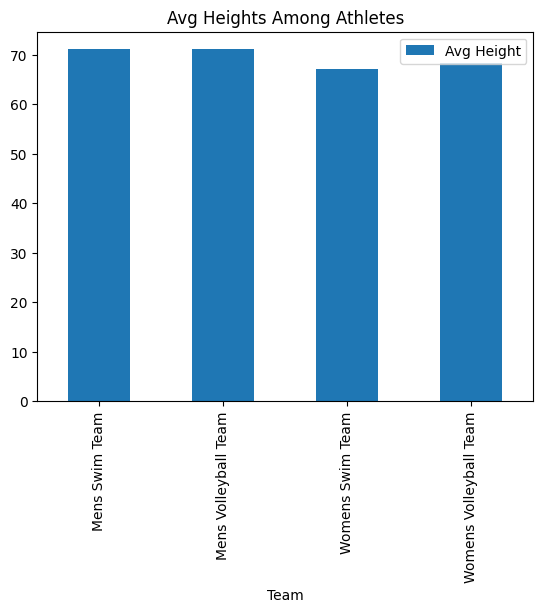

In [38]:
#code for making bar chart
avg_data_df.plot.bar(x='Team', y = 'Avg Height', title='Avg Heights Among Athletes')
plt.show()